In [1]:
#Autres
from sklearn import set_config
set_config(display="diagram")

#HTML
from IPython.core.display import HTML

#built in 
import os

#data
import pandas as pd
import numpy as np

#preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

#impute
from sklearn.impute import SimpleImputer

#compose
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

#pipeline
from sklearn.pipeline import Pipeline, make_pipeline

#estimator
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics

from sklearn.metrics import mean_squared_error, r2_score

#data visualisation
import  matplotlib.pyplot as plt
import seaborn as sns

## Importation des données

In [2]:
source = 'data/cleaned/'
filename = 'df_clean2.csv'
df = pd.read_csv(source + filename, index_col = 0)

In [3]:
df.shape

(2384, 43)

In [4]:
df.reset_index(inplace= True)
df.drop('index', axis = 1, inplace = True)

## Variables retenu pour les modeles

In [5]:
df['GHGEmissionsIntensity_qt'] = pd.qcut(df['GHGEmissionsIntensity'],3)
df['TotalGHGEmissions_qt'] = pd.qcut(df['TotalGHGEmissions'],3)

In [6]:
df['GHGEmissionsIntensity_qt'].value_counts()

(-0.021, 0.39]    800
(1.167, 34.09]    795
(0.39, 1.167]     789
Name: GHGEmissionsIntensity_qt, dtype: int64

In [7]:
df.select_dtypes(exclude = 'object').columns

Index(['CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'NonResidentialGFA', 'delta_Site_WM',
       'delta_Source_WM', 'Delta_Site_Source', 'Delta_Site_Source_WN',
       'NaturalGaz_p', 'Electricity_p', 'ratio_Site_Source_WN',
       'GHGEmissionsIntensity_qt', 'TotalGHGEmissions_qt'],
      dtype='object')

In [304]:
num_features = [
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
    'Electricity_p',
    'NaturalGaz_p',
    'Latitude',
    'Longitude',
    'NonResidentialGFA',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'ENERGYSTARScore']

num_bin_features =  ['NumberofBuildings']

cat_features = [
    'PrimaryPropertyType',
    'BuildingType',
    'LargestPropertyUseType']
#
target = ['TotalGHGEmissions']



In [305]:
cond = df['ENERGYSTARScore'].notna()
df_M = df[cond]
df_M.shape

(1646, 45)

In [46]:
features = num_features + cat_features

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_M,df_M[target], test_size = 0.3, stratify = df_features['TotalGHGEmissions_qt'])

In [92]:
num_t = Pipeline(
    steps=[
    #('imputer', SimpleImputer(strategy = 'constant', fill_value = 0)), !!! nous empeche d'utiliser la methode get_feature_names_out()
    ('poly_t', PolynomialFeatures()),
    ('StandardScaler',StandardScaler()), 
    ])

cat_t = Pipeline(
    steps = [('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [
    ('num_t', num_t, num_features),
    ('cat_t', cat_t, cat_features)],
    remainder = 'drop', verbose_feature_names_out = False, sparse_threshold = 0)

# Estimator : Ridge

In [93]:
ridge_reg_CO2 = Pipeline(steps = 
                [
    ('preprocessor',preprocessor),
    ('ridge_reg', Ridge())
                ])
ridge_reg_CO2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('num_t',
                                                  Pipeline(steps=[('poly_t',
                                                                   PolynomialFeatures()),
                                                                  ('StandardScaler',
                                                                   StandardScaler())]),
                                                  ['LargestPropertyUseTypeGFA',
                                                   'SecondLargestPropertyUseTypeGFA',
                                                   'ThirdLargestPropertyUseTypeGFA',
                                                   'Electricity_p',
                                                   'NaturalGaz_p', 'Latitude',
                                                   'Longitude',
                                                   'NonResidentialGFA',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'ENERGYSTARScore']),
                                                 ('cat_t',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PrimaryPropertyType',
                                                   'BuildingType',
                                                   'LargestPropertyUseType'])],
                                   verbose_feature_names_out=False)),
                ('ridge_reg', Ridge())])

In [50]:
ridge_reg_CO2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'ridge_reg', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num_t', 'preprocessor__cat_t', 'preprocessor__num_t__memory', 'preprocessor__num_t__steps', 'preprocessor__num_t__verbose', 'preprocessor__num_t__poly_t', 'preprocessor__num_t__StandardScaler', 'preprocessor__num_t__poly_t__degree', 'preprocessor__num_t__poly_t__include_bias', 'preprocessor__num_t__poly_t__interaction_only', 'preprocessor__num_t__poly_t__order', 'preprocessor__num_t__StandardScaler__copy', 'preprocessor__num_t__StandardScaler__with_mean', 'preprocessor__num_t__StandardScaler__with_std', 'preprocessor__cat_t__memory', 'preprocessor__cat_t__steps', 'preprocessor__cat_t__verbose', 'preprocessor__cat_t__ohe', 'preprocessor__cat_t__ohe__categories', 'preprocessor__cat_t__ohe

In [94]:
param_grid = {
    'preprocessor__num_t__poly_t__degree' : [1,2],
    'ridge_reg__fit_intercept' : [False,True], 
    'ridge_reg__alpha' : [1,50,110]
}
scoring = 'neg_mean_squared_error'
gs = GridSearchCV(ridge_reg_CO2,
                  param_grid,
                  cv= 10,
                  n_jobs = 1,
                  return_train_score = True,
                  scoring = scoring,
                  verbose = 1).fit(X_train,y_train)
print(gs.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'preprocessor__num_t__poly_t__degree': 2, 'ridge_reg__alpha': 1, 'ridge_reg__fit_intercept': True}


In [95]:
gs.best_params_

{'preprocessor__num_t__poly_t__degree': 2,
 'ridge_reg__alpha': 1,
 'ridge_reg__fit_intercept': True}

In [96]:
ridge_reg_CO2.set_params(**gs.best_params_).fit(X_train, y_train)
y_pred = ridge_reg_CO2.predict(X_test) 
rmse = mean_squared_error(y_test,y_pred,squared= False )
r2 =r2_score(y_test,y_pred)
print(rmse, r2)

174.2106133575082 0.9023713242359912


### Stabilité du modele

In [29]:
rmse_list = []
r2_list = []
for iteration in range(200):
    X_train, X_test, y_train, y_test = train_test_split(df[features],df[target], test_size = 0.3, stratify = df['TotalGHGEmissions_qt'])
    ridge_reg_CO2.set_params(**gs.best_params_).fit(X_train, y_train)
    y_pred = ridge_reg_CO2.predict(df_test)
    
    rmse = mean_squared_error(y_test,y_pred,squared= False )
    rmse_list.append(rmse)
    
    r2 =r2_score(y_test,y_pred)
    r2_list.append(r2)
    
print(f"r2_moyen = {np.mean(r2_list): .02f}, r2_max =  {np.max(r2_list):.02f}, , r2_min = {np.min(r2_list): .02f}")    
print(f"rmse_moyen = {np.mean(rmse_list): .02f}, rmse_min = {np.min(rmse_list):.02f}, , rmse_max = {np.max(rmse_list): .02f}")

r2_moyen = -2.40, r2_max =  -0.08, , r2_min = -15.48
rmse_moyen =  881.29, rmse_min = 655.48, , rmse_max =  1205.91


In [759]:
X_train = preprocessor.fit_transform(df_train)
y_train = df_train['TotalGHGEmissions']
X_test = preprocessor.fit_transform(df_test)
y_test = df_test['TotalGHGEmissions']

In [148]:
def plot_learning_curves(model, X, y):
    rmse_train, rmse_test = [], []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18,
                                                       stratify = df['TotalGHGEmissions_qt'])

    for m in np.arange(1, len(X_train),1):
        #on fit le modele sur le m variables
        model.fit(X_train[:m], y_train[:m])
        
        #on effectue les prédiction sur le set train et test
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
            
        rmse_train.append(mean_squared_error(y_train[:m], y_train_pred, squared = False))
        rmse_test.append(mean_squared_error(y_test, y_test_pred, squared = False))

    df_graph = pd.DataFrame({'rmse_test':rmse_test,'rmse_train':rmse_train})
    fig , ax = plt.subplots(1,1, figsize = (10,6))
    
    sns.lineplot(data = df_graph, x = df_graph.index, y = 'rmse_test')
    sns.lineplot(data = df_graph, x = df_graph.index, y = 'rmse_train', color = 'tab:red')
    
    plt.ylim(0,1000)
    plt.show()

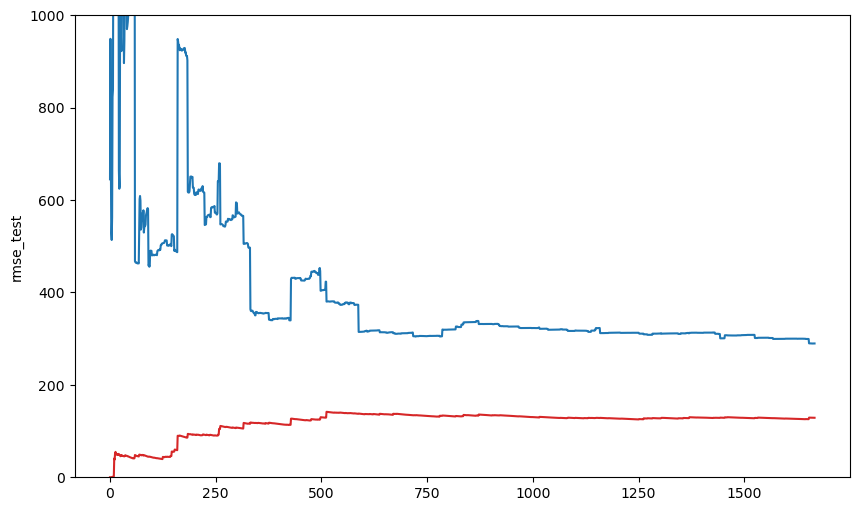

In [149]:
plot_learning_curves(Ridge_reg_CO2, df_M, df_M['TotalGHGEmissions'])

### analyse de l'atypicité des observations

(2384, 45)

In [168]:
feature_names = preprocessor.get_feature_names_out()
data = preprocessor.fit_transform(df_M)
X_df = pd.DataFrame(data = data, columns = feature_names)
X_df.drop('1', axis = 1 , inplace = True)
y_df = df_M['TotalGHGEmissions']

0        249.98
1        295.86
2       2089.28
3        286.43
4        505.01
         ...   
2364      15.07
2366      96.90
2374       3.50
2377       7.79
2379      20.94
Name: TotalGHGEmissions, Length: 1646, dtype: float64

In [163]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import plotly.express as px

from plotly import graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks

In [173]:
model = sm.OLS(y_df, data)

In [167]:
model = sm.OLS(y_df, X_df.assign(const = 1))

ValueError: The indices for endog and exog are not aligned

In [174]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     447.0
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:50:34   Log-Likelihood:                -10160.
No. Observations:                1646   AIC:                         2.055e+04
Df Residuals:                    1531   BIC:                         2.117e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.152e-06   2.63e-06     -1.199      0.231   -8.31e-06    2.01e-06
x1          4.207e+05   1.18e+05      3.573      0.000     1.9e+05    6.52e+05
x2         -7.297e+04   3.98e+04     -1.832      0.067   -1.51e+05    5175.591
x3          5.906e+04   7.46e+04      0.791      0.429   -8.73e+04    2.05e+05
x4         -1.322e+05   2.64e+05     -0.501      0.616    -6.5e+05    3.85e+05
x5         -1.612e+05   2.63e+05     -0.613      0.540   -6.76e+05    3.54e+05
x6           530.7092   1.34e+04      0.039      0.969   -2.58e+04    2.69e+04
x7         -4.116e+04   2.18e+04     -1.886      0.059    -8.4e+04    1644.367
x8          3.283e+05   6.92e+04      4.746      0.000    1.93e+05    4.64e+05
x9         -2.006e+05   4.19e+04     -4.793      0.000   -2.83e+05   -1.19e+05
x10        -2.437e+05   1.09e+05     -2.239      0.025   -4.57e+05   -3.02e+04
x11        -1.952e+04   1.52e+04     -1.280      0.201   -4.94e+04    1.04e+04
x12          -43.8564    132.811     -0.330      0.741    -304.366     216.653
x13         -888.0121    308.676     -2.877      0.004   -1493.484    -282.540
x14         -210.3721    144.544     -1.455      0.146    -493.898      73.154
x15        -1312.7252    323.662     -4.056      0.000   -1947.592    -677.858
x16         -226.0951    108.340     -2.087      0.037    -438.605     -13.585
x17         6.658e+04    2.9e+04      2.298      0.022    9739.845    1.23e+05
x18         4.855e+05   1.26e+05      3.861      0.000    2.39e+05    7.32e+05
x19         2795.2277   1333.753      2.096      0.036     179.052    5411.403
x20         -121.7948     60.288     -2.020      0.044    -240.051      -3.538
x21          302.4038    179.674      1.683      0.093     -50.029     654.837
x22         -291.1582     63.165     -4.609      0.000    -415.057    -167.259
x23         -234.9161    133.073     -1.765      0.078    -495.941      26.109
x24         -239.9557    121.136     -1.981      0.048    -477.566      -2.345
x25         -171.3479    100.321     -1.708      0.088    -368.130      25.434
x26          -57.5608     39.859     -1.444      0.149    -135.745      20.624
x27        -2295.8015   9828.156     -0.234      0.815   -2.16e+04     1.7e+04
x28        -7.546e+04   4.14e+04     -1.823      0.068   -1.57e+05    5724.187
x29         1664.8742    822.019      2.025      0.043      52.473    3277.276
x30          -16.6610     19.436     -0.857      0.391     -54.785      21.463
x31          286.2330     72.632      3.941      0.000     143.765     428.701
x32           21.8408     22.743      0.960      0.337     -22.770      66.452
x33          -29.5513     89.344     -0.331      0.741    -204.801     145.698
x34         -438.5710    142.791     -3.071      0.002    -718.657    -158.485
x35         -214.8331     90.263     -2.380      0.017    -391.886     -37.781
x3

In [175]:
#studentized residual 
influence = OLSInfluence(results)
sresiduals = influence.resid_studentized_internal
print(sresiduals.idxmin(), sresiduals.min())

1131 -19.18012875045588


/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning:

invalid value encountered in sqrt



In [176]:
outlier = df.loc[sresiduals.idxmin(),:]
print('TotalGHGEmissions', outlier[target])
print(outlier[num_features])

TotalGHGEmissions TotalGHGEmissions    913.07
Name: 1131, dtype: object
LargestPropertyUseTypeGFA           726000.0
SecondLargestPropertyUseTypeGFA          0.0
ThirdLargestPropertyUseTypeGFA           0.0
Electricity_p                       0.627519
NaturalGaz_p                        0.372481
Latitude                            47.61935
Longitude                         -122.33389
NonResidentialGFA                     726000
PropertyGFAParking                         0
PropertyGFABuilding(s)                724148
ENERGYSTARScore                          8.0
Name: 1131, dtype: object


In [177]:
data = pd.DataFrame(columns=['Id', 'X', 'TotalGHGEmissions','Y', 'OverallQual', 'Dist'])
data['Id'] = np.arange(y_df.shape[0])
data['TotalGHGEmissions'] = y_df
data['X'] = influence.hat_matrix_diag
data['Y'] = influence.resid_studentized_internal
data['Dist'] = influence.cooks_distance[0]
fig = px.scatter(data, x= 'X', y='Y', hover_data =['Id','TotalGHGEmissions' ])
fig.show()

/home/bryan/anaconda3/envs/KeFlow/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:716: RuntimeWarning:

divide by zero encountered in true_divide



In [178]:
cufflinks.go_offline(connected = True)
init_notebook_mode(connected= True)

data.iplot(
    x='X',
    y='Y',
    size=data['Dist']*1.5, 
    text='Dist',
    mode='markers',
    layout=dict(xaxis=dict(title='Id')))

ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [674]:
influence = OLSInfluence(results)
C = influence.cooks_distance[0]

Cook = pd.DataFrame(columns = ['Id', "Cook_'s Distance"])
Cook['Id'] = np.arange(0,2406,1)
Cook["Cook's Distance"] = C
fig = px.line(Cook, x="Id", y="Cook's Distance", title = "Cook's Distance")
fig.show()

## Supression des outliers

In [675]:
outlier_idx = [33,2325]
df.loc[outlier_idx,:]

BuildingType PrimaryPropertyType  CouncilDistrictCode      Neighborhood  \
33         Campus  Mixed Use Property                    2  GREATER DUWAMISH   
2325       Campus          University                    4         NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
33    47.53493 -122.31788       1992                1.0               3   
2325  47.65644 -122.31041       1900              111.0               0   

      PropertyGFATotal  ...  GHGEmissionsIntensity  NonResidentialGFA  \
33              494835  ...                  34.09            1856706   
2325           9320156  ...                   1.20            9320156   

     delta_Site_WM  delta_Source_WM Delta_Site_Source  Delta_Site_Source_WN  \
33      -11.400009       -12.099976       -166.500015           -167.199982   
2325     93.800003       246.600006       -152.800003              0.000000   

     NaturalGaz_p  Electricity_p  GHGEmissionsIntensity_qt  \
33       0.664404       0.335596             (1.17, 34.09]   
2325     0.000000       0.885474             (1.17, 34.09]   

      TotalGHGEmissions_qt  
33       (83.35, 16870.98]  
2325     (83.35, 16870.98]  

[2 rows x 43 columns]

In [676]:
X_df.drop(outlier_idx, axis = 0, inplace = True)
y_df.drop(outlier_idx, axis = 0, inplace = True)

In [677]:
model = sm.OLS(y_df, X_df.assign(const = 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:34:11   Log-Likelihood:                -16549.
No. Observations:                2404   AIC:                         3.317e+04
Df Residuals:                    2366   BIC:                         3.339e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
SecondLargestPropertyUseTypeGFA                          -85.3824     35.923     -2.377      0.018    -155.826     -14.938
Electricity_p                                            -17.9322     28.736     -0.624      0.533     -74.282      38.417
PropertyGFAParking                                        -9.7216     30.611     -0.318      0.751     -69.748      50.305
PropertyGFABuilding(s)                                  1400.8745     49.654     28.213      0.000    1303.506    1498.243
SecondLargestPropertyUseTypeGFA^2                         37.8401     25.977      1.457      0.145     -13.099      88.779
SecondLargestPropertyUseTypeGFA Electricity_p            -17.6468     34.693     -0.509      0.611     -85.678      50.384
SecondLargestPropertyUseTypeGFA PropertyGFAParking       -56.0494     16.171     -3.466      0.001     -87.761     -24.338
SecondLargestPropertyUseTypeGFA PropertyGFABuilding(s)   207.8959     29.840      6.967      0.000     149.380     266.411
Electricity_p^2                                           52.3873     28.930      1.811      0.070      -4.343     109.118
Electricity_p PropertyGFAParking                          56.7960     32.143      1.767      0.077      -6.235     119.827
Electricity_p PropertyGFABuilding(s)                   -1155.9700     52.177    -22.155      0.000   -1258.287   -1053.653
PropertyGFAParking^2                                      -1.5630     16.707     -0.094      0.925     -34.325      31.199
PropertyGFAParking PropertyGFABuilding(s)                 -3.3071     12.901     -0.256      0.798     -28.605      21.990
PropertyGFABuilding(s)^2                               -1437.0881    214.573     -6.697      0.000   -1857.859   -1016.317
PrimaryPropertyType_Distribution Center                 -194.6978     33.105     -5.881      0.000    -259.617    -129.779
PrimaryPropertyType_High-Rise Multifamily               -318.4935     31.022    -10.267      0.000    -379.326    -257.661
PrimaryPropertyType_Hospital                            3018.7346     80.531     37.485      0.000    2860.816    3176.653
PrimaryPropertyType_Hotel                                -72.9652     29.011     -2.515      0.012    -129.855     -16.075
PrimaryPropertyType_K-12 School                         -245.1485     22.812    -10.747      0.000    -289.881    -200.416
PrimaryPropertyType_Laboratory                           484.9698     73.208      6.625      0.000     341.411     628.528
PrimaryPropertyType_Large Office                        -105.9472     25.353     -4.179      0.000    -155.664     -56.231
PrimaryPropertyType_Low-Rise Multifamily                -172.4564     16.862    -10.227      0.000    -205.523    -139.390
PrimaryP

### interpretation

In [687]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
vif

VIF Factor                                           features
0    50.452737                    SecondLargestPropertyUseTypeGFA
1    34.986001                                      Electricity_p
2    39.740739                                 PropertyGFAParking
3    41.037132                             PropertyGFABuilding(s)
4    19.464811                  SecondLargestPropertyUseTypeGFA^2
5    50.379123      SecondLargestPropertyUseTypeGFA Electricity_p
6    11.091889  SecondLargestPropertyUseTypeGFA PropertyGFAPar...
7    36.819755  SecondLargestPropertyUseTypeGFA PropertyGFABui...
8    35.466803                                    Electricity_p^2
9    43.819454                   Electricity_p PropertyGFAParking
10   40.519855               Electricity_p PropertyGFABuilding(s)
11   11.839102                               PropertyGFAParking^2
12    7.058801          PropertyGFAParking PropertyGFABuilding(s)
13   20.400716                           PropertyGFABuilding(s)^2
14    1.023888            PrimaryPropertyType_Distribution Center
15    1.187073          PrimaryPropertyType_High-Rise Multifamily
16    1.237426                       PrimaryPropertyType_Hospital
17    1.121712                          PrimaryPropertyType_Hotel
18    1.147649                    PrimaryPropertyType_K-12 School
19    1.012098                     PrimaryPropertyType_Laboratory
20    1.747606                   PrimaryPropertyType_Large Office
21    1.180681           PrimaryPropertyType_Low-Rise Multifamily
22    1.054693                 PrimaryPropertyType_Medical Office
23    1.208866           PrimaryPropertyType_Mid-Rise Multifamily
24    1.066808             PrimaryPropertyType_Mixed Use Property
25    1.002203                         PrimaryPropertyType_Office
26    1.069825                          PrimaryPropertyType_Other
27    1.009099         PrimaryPropertyType_Refrigerated Warehouse
28    1.005540                 PrimaryPropertyType_Residence Hall
29    1.010509                     PrimaryPropertyType_Restaurant
30    1.046716                   PrimaryPropertyType_Retail Store
31    1.013469          PrimaryPropertyType_Self-Storage Facility
32    1.034843          PrimaryPropertyType_Senior Care Community
33    1.121107    PrimaryPropertyType_Small- and Mid-Sized Office
34    1.037415    PrimaryPropertyType_Supermarket / Grocery Store
35    1.041629                     PrimaryPropertyType_University
36    1.078031                      PrimaryPropertyType_Warehouse
37    1.084183               PrimaryPropertyType_Worship Facility

In [729]:
df_train, df_test = train_test_split(df, test_size = 0.3)
lin_reg_CO2.set_params(**gs.best_params_).fit(df_train, df_train['TotalGHGEmissions'])
y_pred = lin_reg_CO2.predict(df_test)
rmse = mean_squared_error(df_test['TotalGHGEmissions'],y_pred,squared= False )
r2 =r2_score(df_test['TotalGHGEmissions'],y_pred)
print(rmse, r2)

279.68981413962797 -0.18307278957313167


In [199]:
coef = ridge_reg_CO2[-1].coef_
coef.shape

(1, 126)

In [201]:
feature_names = ridge_reg_CO2[:-1].get_feature_names_out().tolist()
#features_names = [x[x.find('__')+2:] for x in features_names]
coef = ridge_reg_CO2[-1].coef_
df_coef= pd.DataFrame(data=coef.T,columns = ['coefficient'],index = feature_names)

In [202]:
df_coef

coefficient
1                                                     0.000000
LargestPropertyUseTypeGFA                           218.691390
SecondLargestPropertyUseTypeGFA                     -29.990654
ThirdLargestPropertyUseTypeGFA                      101.665475
Electricity_p                                       -50.146363
...                                                        ...
LargestPropertyUseType_Retail Store                 -27.803789
LargestPropertyUseType_Senior Care Community        -39.974631
LargestPropertyUseType_Supermarket/Grocery Store     54.054344
LargestPropertyUseType_Wholesale Club/Supercenter   -30.769747
LargestPropertyUseType_Worship Facility             -63.474529

[126 rows x 1 columns]

In [203]:
df_coef.drop("1", axis = 0, inplace = True)

In [204]:
df_coef['abs_coefficient']= df_coef['coefficient'].abs()

In [205]:
df_coef = df_coef.sort_values(by= 'abs_coefficient', ascending = False)

In [206]:
df_graph = df_coef.iloc[0:30]

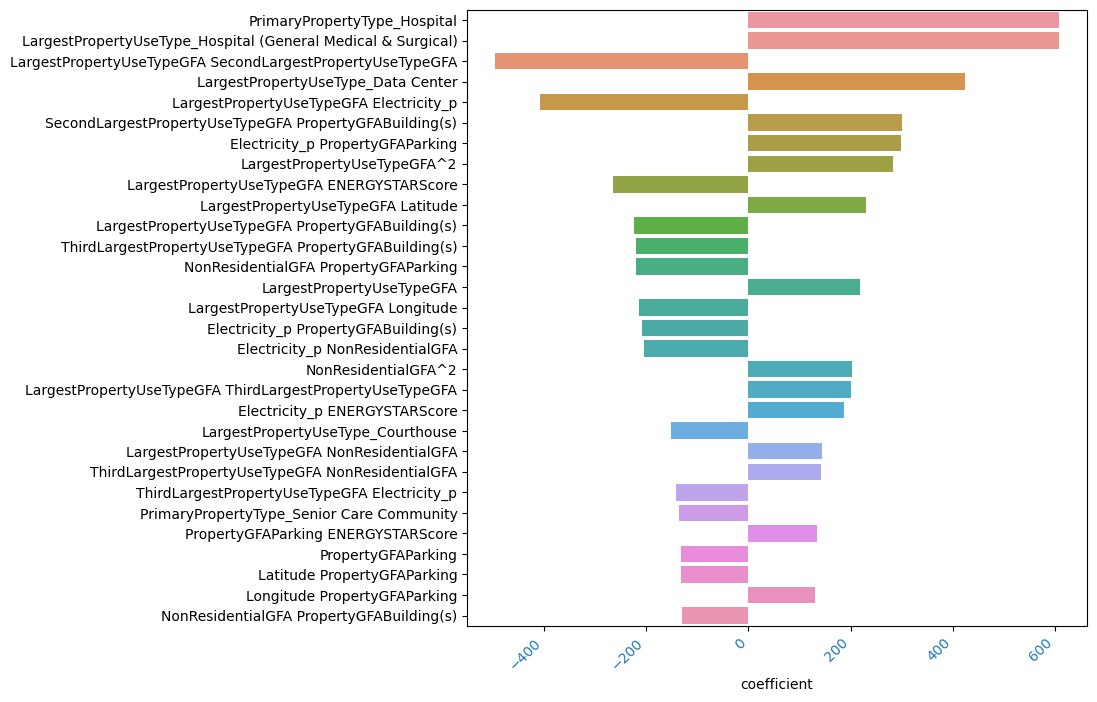

In [207]:
plt.figure(figsize = (8,8))
sns.barplot(data = df_graph, x = 'coefficient', y = df_graph.index[])
plt.xticks(color = 'tab:blue', rotation = 45, ha = 'right')
plt.show()

### mise en place de la Shape Value

In [ ]:
import shap

In [104]:
y_train.shape

(1152, 1)

In [103]:
X_train_spo.shape

(1152, 126)

In [119]:
X_train_spo = preprocessor.fit_transform(X_train)
ridge.fit(X_train_spo, y_train)

Ridge()

In [120]:
explainer = shap.explainers.Linear(ridge,X_train_spo,model_output="raw" )

In [121]:
shap_values = explainer.shap_values(X_train_spo)

In [133]:
feature_names = preprocessor.get_feature_names_out()

array([[   0.        ,  -47.78528528,   13.18357859, ...,   -2.70271719,
          -0.        ,    1.90423588],
       [   0.        , -119.3913225 ,    8.93527034, ...,   -2.70271719,
          -0.        ,    1.90423588],
       [   0.        ,  -77.41968048,   13.18357859, ...,   -2.70271719,
          -0.        ,    1.90423588],
       ...,
       [   0.        , -119.70762354,    8.97881721, ...,   -2.70271719,
          -0.        ,    1.90423588],
       [   0.        ,  -14.11127392,   -1.5259321 , ...,   -2.70271719,
          -0.        ,    1.90423588],
       [   0.        ,  -88.08655656,   13.18357859, ...,   -2.70271719,
          -0.        ,    1.90423588]])

In [294]:
df_train = pd.DataFrame(X_train_spo, columns = feature_names)
df_train.mean().sort_values(ascending=False).round(5).head(15)

BuildingType_NonResidential                          0.58681
LargestPropertyUseType_Multifamily Housing           0.34375
LargestPropertyUseType_Office                        0.25087
BuildingType_Multifamily LR (1-4)                    0.16840
PrimaryPropertyType_Low-Rise Multifamily             0.15451
BuildingType_Multifamily MR (5-9)                    0.15278
PrimaryPropertyType_Mid-Rise Multifamily             0.14497
PrimaryPropertyType_Small- and Mid-Sized Office      0.14323
PrimaryPropertyType_Large Office                     0.10069
LargestPropertyUseType_Non-Refrigerated Warehouse    0.09115
PrimaryPropertyType_Warehouse                        0.08941
PrimaryPropertyType_K-12 School                      0.06597
LargestPropertyUseType_K-12 School                   0.06597
PrimaryPropertyType_Retail Store                     0.04688
LargestPropertyUseType_Retail Store                  0.04688
dtype: float64

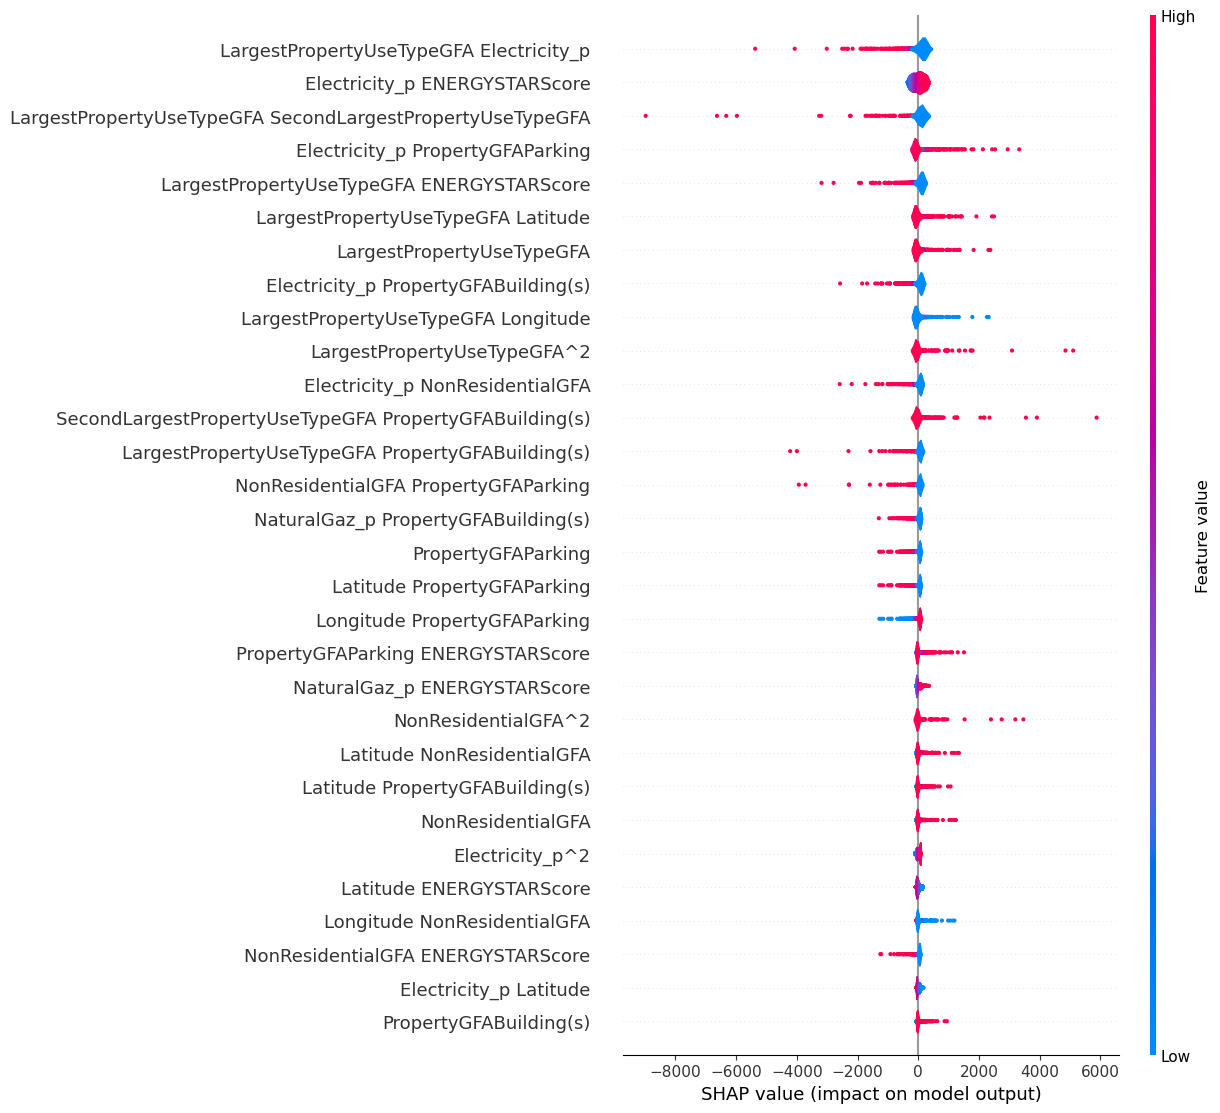

In [284]:
shap.summary_plot(shap_values,X_train_spo, feature_names=feature_names,max_display=30, plot_type = 'violin')

In [130]:
df_X_train_spo = pd.DataFrame(X_train_spo, columns = feature_names)

In [212]:
shap_values.shape

(1152, 126)

In [214]:
shap_values[0].shape

(126,)

In [211]:
shap_values[:,1].shape

(1152,)

In [278]:
df_shap_values = pd.DataFrame(data = shap_values, columns = feature_names)
df_shap_values

1  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0     0.0                 -47.785285                        13.183579   
1     0.0                -119.391322                         8.935270   
2     0.0                 -77.419680                        13.183579   
3     0.0                 312.980152                      -175.312160   
4     0.0                 -59.991493                        -7.788594   
...   ...                        ...                              ...   
1147  0.0                 -17.661377                         0.741616   
1148  0.0                 152.479966                        13.183579   
1149  0.0                -119.707624                         8.978817   
1150  0.0                 -14.111274                        -1.525932   
1151  0.0                 -88.086557                        13.183579   

      ThirdLargestPropertyUseTypeGFA  Electricity_p  NaturalGaz_p  Latitude  \
0                          -8.074325     -41.412118     11.777705 -0.009675   
1                          -8.074325     -48.444821     13.808482 -0.030168   
2                          -8.074325      17.527112     -5.241697 -0.010538   
3                         867.483946      -5.165348      1.311020 -0.003623   
4                          -8.074325      13.055748     -3.950537 -0.029162   
...                              ...            ...           ...       ...   
1147                       16.722327      48.757167    -14.259746  0.000316   
1148                       -8.074325      40.410718    -11.849610 -0.024014   
1149                       -8.074325       8.339125     -2.588557 -0.002205   
1150                       -8.074325      32.544511     -9.578149 -0.030291   
1151                       -8.074325     -10.824261      2.945099 -0.003614   

      Longitude  NonResidentialGFA  PropertyGFAParking  ...  \
0      1.567171         -11.141695           47.100029  ...   
1     -2.424322         -51.758697           47.100029  ...   
2      1.429079         -23.403890           47.100029  ...   
3     -0.034030         220.983058         -319.943457  ...   
4      0.178039           4.818167           47.100029  ...   
...         ...                ...                 ...  ...   
1147  -2.789278          16.284488          -22.538193  ...   
1148   3.342629          71.724567           47.100029  ...   
1149  -2.264860         -51.802324           47.100029  ...   
1150  10.646667         -41.278338           47.100029  ...   
1151   2.107124         -27.817657           47.100029  ...   

      LargestPropertyUseType_Office  LargestPropertyUseType_Other  \
0                        -41.598463                          -0.0   
1                         11.057819                          -0.0   
2                         11.057819                          -0.0   
3                         11.057819                          -0.0   
4                         11.057819                          -0.0   
...                             ...                           ...   
1147                      11.057819                          -0.0   
1148                      11.057819                          -0.0   
1149                      11.057819                          -0.0   
1150                      11.057819                          -0.0   
1151                      11.057819                          -0.0   

      LargestPropertyUseType_Parking  \
0                           0.794276   
1                           0.794276   
2                           0.794276   
3                           0.794276   
4                           0.794276   
...                              ...   
1147                        0.794276   
1148                        0.794276   
1149                        0.794276   
1150                        0.794276   
1151                        0.794276   

      LargestPropertyUseType_Refrigerated Warehouse  \
0                                              -0.0   
1    

In [255]:
data = pd.DataFrame(df_shap_values.loc[0].values, index = feature_names)
data[0]

1                                                     0.000000
LargestPropertyUseTypeGFA                           -47.785285
SecondLargestPropertyUseTypeGFA                      13.183579
ThirdLargestPropertyUseTypeGFA                       -8.074325
Electricity_p                                       -41.412118
                                                       ...    
LargestPropertyUseType_Retail Store                   1.112152
LargestPropertyUseType_Senior Care Community          1.199239
LargestPropertyUseType_Supermarket/Grocery Store     -2.702717
LargestPropertyUseType_Wholesale Club/Supercenter    -0.000000
LargestPropertyUseType_Worship Facility               1.904236
Name: 0, Length: 126, dtype: float64

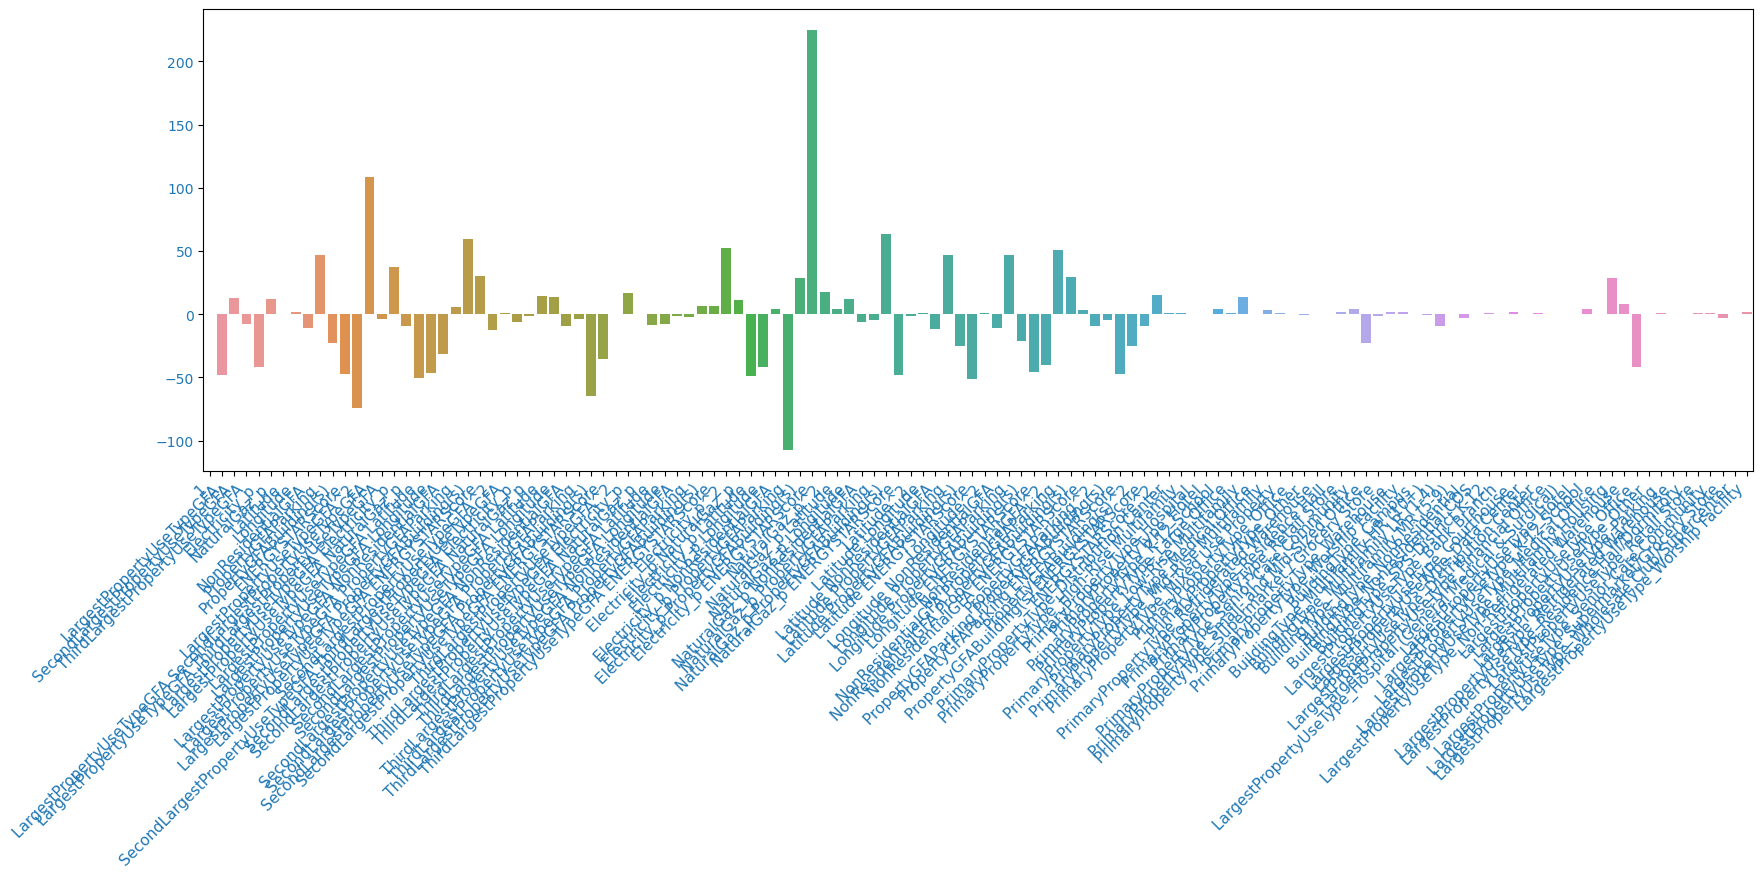

In [257]:
#pour la premiere observation
fig , ax = plt.subplots(1,1,figsize = (20,6))
data = pd.DataFrame(df_shap_values.loc[0].values, index = feature_names)
sns.barplot(data, y=data[0].values, x =data.index)

for xtick in ax.xaxis.get_ticklabels():
        xtick.set_color('tab:blue')
        xtick.set_fontsize(11)
        xtick.set_rotation(45)
        xtick.set_ha('right')
        
for ytick in ax.yaxis.get_ticklabels():
        ytick.set_color('tab:blue')
        ytick.set_fontsize(10)


In [262]:
liste_energy_score = []
for elem in feature_names:
    if 'ENERGYSTARScore' in elem :
        liste_energy_score.append(elem)

In [263]:
liste_energy_score

['ENERGYSTARScore',
 'LargestPropertyUseTypeGFA ENERGYSTARScore',
 'SecondLargestPropertyUseTypeGFA ENERGYSTARScore',
 'ThirdLargestPropertyUseTypeGFA ENERGYSTARScore',
 'Electricity_p ENERGYSTARScore',
 'NaturalGaz_p ENERGYSTARScore',
 'Latitude ENERGYSTARScore',
 'Longitude ENERGYSTARScore',
 'NonResidentialGFA ENERGYSTARScore',
 'PropertyGFAParking ENERGYSTARScore',
 'PropertyGFABuilding(s) ENERGYSTARScore',
 'ENERGYSTARScore^2']

In [264]:
df_shap_values[liste_energy_score]

ENERGYSTARScore  LargestPropertyUseTypeGFA ENERGYSTARScore  \
0          -46.906719                                  30.284188   
1          -21.699346                                 135.668300   
2           -0.693203                                  97.880120   
3            3.508026                                -292.084395   
4          -57.409790                                  39.641982   
...               ...                                        ...   
1147       123.243044                                 162.391149   
1148       -57.409790                                -269.200195   
1149       119.041815                                 173.885525   
1150       -59.510405                                 -29.245812   
1151       -44.806104                                  86.802676   

      SecondLargestPropertyUseTypeGFA ENERGYSTARScore  \
0                                          -35.751614   
1                                          -24.714989   
2                                          -35.751614   
3                                          377.623601   
4                                           30.760510   
...                                               ...   
1147                                       -32.393400   
1148                                       -35.751614   
1149                                       -34.332979   
1150                                        11.395094   
1151                                       -35.751614   

      ThirdLargestPropertyUseTypeGFA ENERGYSTARScore  \
0                                           6.733722   
1                                           6.733722   
2                                           6.733722   
3                                        -553.651262   
4                                           6.733722   
...                                              ...   
1147                                        4.780412   
1148                                        6.733722   
1149                                        6.733722   
1150                                        6.733722   
1151                                        6.733722   

      Electricity_p ENERGYSTARScore  NaturalGaz_p ENERGYSTARScore  \
0                        224.795205                    -48.358700   
1                        165.921255                    -61.925070   
2                        -48.544038                     33.879312   
3                         -8.061766                     -0.950790   
4                         85.507695                     63.377028   
...                             ...                           ...   
1147                    -319.092873                    -45.070546   
1148                      -0.558346                    119.110418   
1149                    -298.767502                    -49.617369   
1150                      28.132032                    104.839114   
1151                     128.283873                      9.831106   

      Latitude ENERGYSTARScore  Longitude ENERGYSTARScore  \
0                   -51.025951                 -45.927526   
1                   -23.318452                 -21.272821   
2                    -0.639541                  -0.670539   
3                     3.874920                   3.434118   
4                   -62.210167                 -56.226777   
...                        ...                        ...   
1147                134.445213                 120.700389   
1148                -62.280266                 -56.196346   
1149                129.866149                 116.585677   
1150                -64.481714                 -58.182360   
1151                -48.813298                 -43.865486   

      NonResidentialGFA ENERGYSTARScore  PropertyGFAParking ENERGYSTARScore  \
0                              2.974044                          -46.946449   
1                             47.460545                          -46.946449   
2                             24

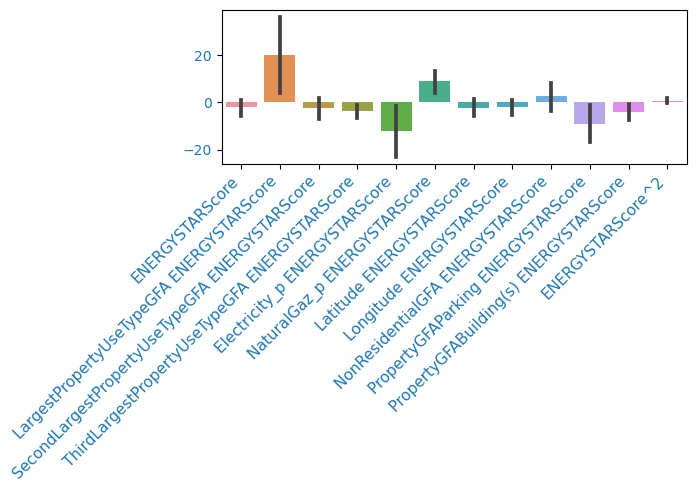

In [269]:
fig , ax = plt.subplots(1,1,figsize = (6,2))
sns.barplot(df_shap_values[liste_energy_score])
for xtick in ax.xaxis.get_ticklabels():
        xtick.set_color('tab:blue')
        xtick.set_fontsize(11)
        xtick.set_rotation(45)
        xtick.set_ha('right')
        
for ytick in ax.yaxis.get_ticklabels():
        ytick.set_color('tab:blue')
        ytick.set_fontsize(10)


In [273]:
df_graph = df_coef.loc[liste_energy_score]

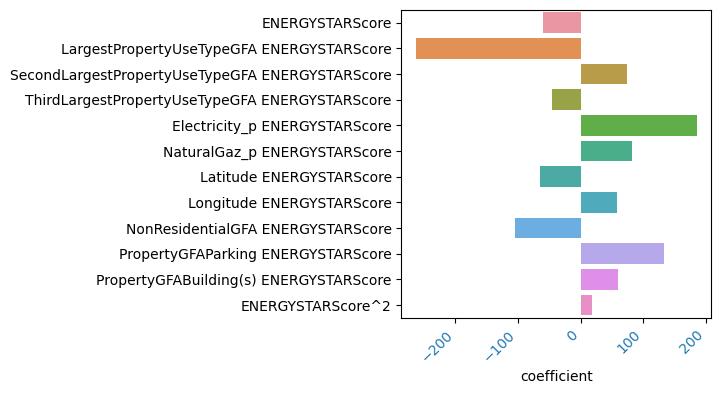

In [275]:
plt.figure(figsize = (4,4))
sns.barplot(data = df_graph, x = 'coefficient', y = df_graph.index)
plt.xticks(color = 'tab:blue', rotation = 45, ha = 'right')
plt.show()

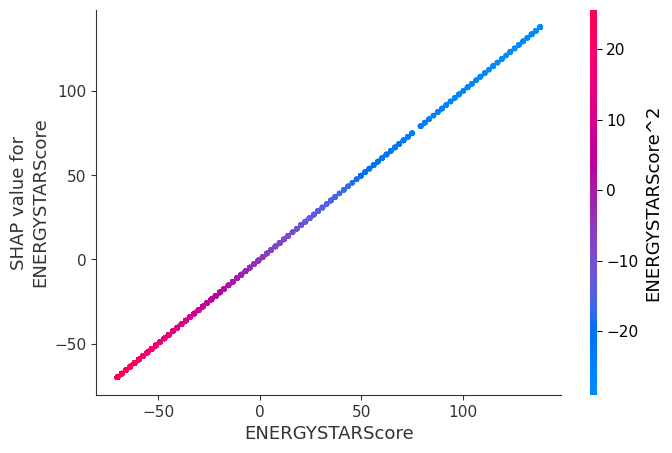

In [279]:
shap.dependence_plot("ENERGYSTARScore", shap_values, df_shap_values)

#  Shap value TUTO

In [306]:
X1000 = shap.utils.sample(df_M[features], 1000)

In [308]:
X_spo = preprocessor.fit_transform(df_M[features])

ValueError: A given column is not a column of the dataframe